<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt
from  tensorflow.keras.datasets import fashion_mnist

In [2]:
#
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()
train_data[0].shape

4431872/4422102 [==============================] - 0s 0us/step


(28, 28)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



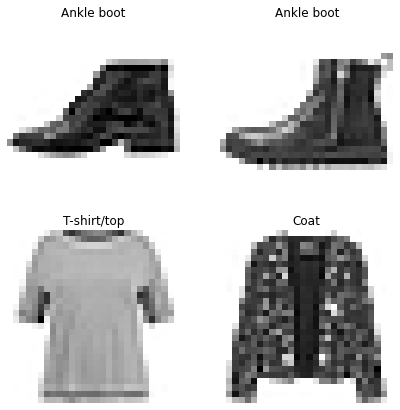

In [4]:
import random 
plt.figure(figsize=(7,7 ))
for i in range (4):
    ax=plt.subplot(2,2,i+1)
    number=random.choice(range(len(train_data)))
    plt.imshow(train_data[number],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[number]])
    plt.axis(False)

In [5]:
#checking out input and output shape
train_data.shape,train_labels[0].shape# we have 10 output shape because we have 10 classes

((60000, 28, 28), ())

In [6]:
#creating model

tf.random.set_seed(42)
model1=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),# we have to define out input shape 
tf.keras.layers.Dense(4,activation="relu"),    
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(10,activation="softmax")
])
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
# if our labels are one-hot encoded we need use CategoricalCrossentropy() ,and if  our labels are int encoded we need use SpareCategoricalCrossentropy()
history1=model1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_accuracy

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [8]:
#lets normalize our data 
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
#train our data with normalized data
tf.random.set_seed(42)
model2=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(10,activation="softmax"),
])
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history2=model2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [ ]:
model2.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.8014


[0.5658251047134399, 0.8014000058174133]

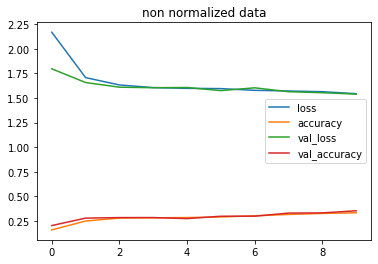

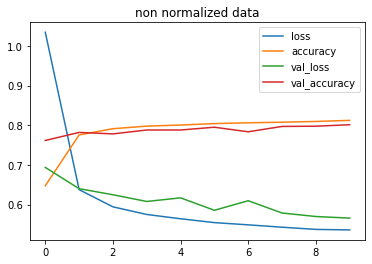

In [ ]:
#ploting loss curves
pd.DataFrame(history1.history).plot(title="non normalized data")
pd.DataFrame(history2.history).plot(title="non normalized data")

In [9]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28))                            ,
tf.keras.layers.Dense(4,activation="relu")                            ,
tf.keras.layers.Dense(4,activation="relu")                            ,
tf.keras.layers.Dense(10,activation="softmax")                            
])
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=["accuracy"])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))
history3=model3.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 

ValueError: ignored

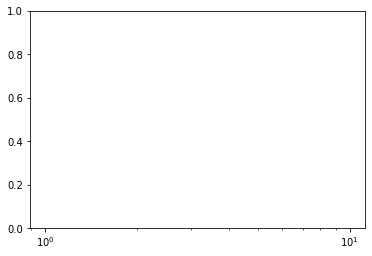

In [12]:
lrs=1e-3* (10**(tf.range(40)/20))
plt.semilogx(lrs, history3.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("best learning rate")

In [10]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [13]:
y_probs=model3.predict(test_data_norm)
y_probs[:5]

array([[8.96906494e-10, 5.18606242e-08, 8.01632996e-06, 6.05999458e-06,
        1.02002405e-05, 5.62916957e-02, 6.62734649e-08, 6.11322895e-02,
        1.84057420e-03, 8.80711019e-01],
       [1.37860152e-05, 2.08950736e-17, 9.00921404e-01, 2.52439600e-06,
        6.05174564e-02, 8.89865455e-15, 3.83380614e-02, 1.58175742e-30,
        2.06723082e-04, 1.83611155e-21],
       [1.05800034e-04, 9.86548722e-01, 6.20622814e-06, 1.30502358e-02,
        1.86330726e-04, 3.49123898e-12, 9.87315652e-05, 1.98227177e-08,
        3.51314634e-06, 3.28147280e-07],
       [2.70348801e-06, 9.94456291e-01, 1.96968449e-06, 5.12963161e-03,
        2.49601493e-04, 2.69976558e-11, 1.73834069e-05, 7.90176671e-07,
        1.93968162e-06, 1.39663141e-04],
       [2.83802062e-01, 1.05068002e-05, 9.58715752e-02, 2.13284791e-02,
        3.75339985e-02, 7.40879797e-13, 5.61255693e-01, 1.46258622e-18,
        1.97644127e-04, 2.50447737e-15]], dtype=float32)

In [ ]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

In [15]:
y_preds=y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
confusion_matrix(y_true=test_labels,y_pred=y_preds)

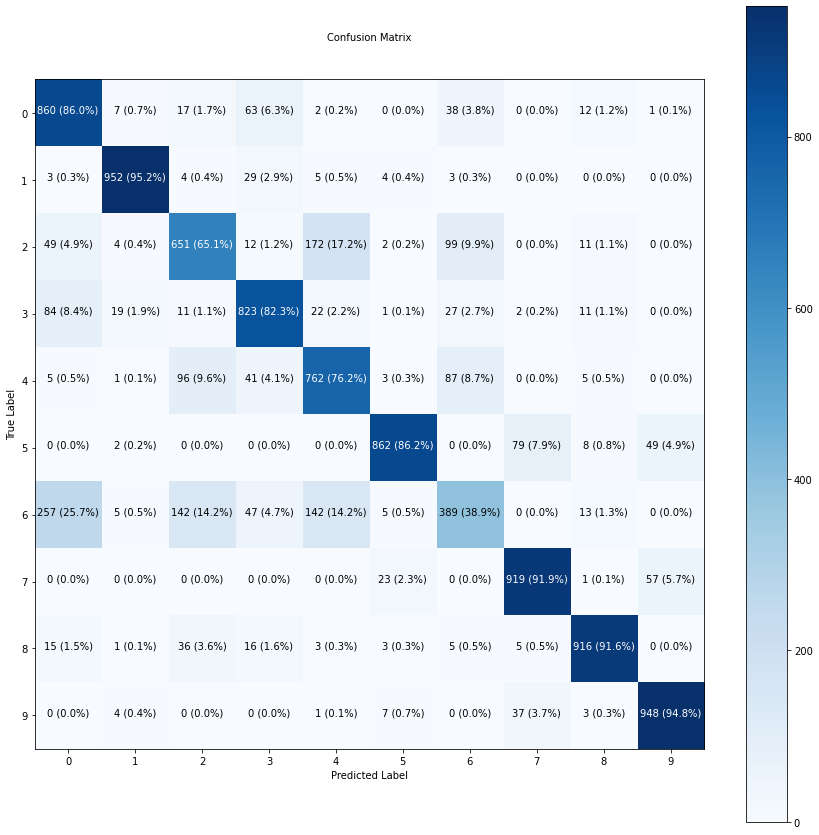

In [17]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,figsize=(15,15),text_size=10)

In [24]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

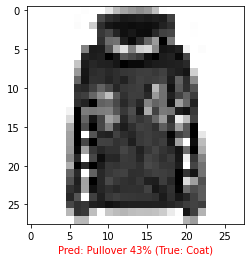

In [36]:
plot_random_image(model=model3,images=test_data_norm,true_labels=test_labels,classes=class_names)

In [41]:
# we can get the patterns of a layer in model
weights,biases=model3.layers[1].get_weights()
weights,weights.shape



(array([[ 3.0888996 , -2.4215217 ,  0.44180393, -3.0614772 ],
        [ 0.9838672 , -2.7353768 , -0.34102204, -1.1591084 ],
        [ 2.6268623 , -1.6986037 , -2.6450644 , -2.3452106 ],
        ...,
        [-0.54319924,  2.1052063 , -0.21971679,  0.74242526],
        [-0.5939366 ,  3.333258  ,  1.4414967 , -1.5162395 ],
        [ 0.9036091 , -0.6189765 ,  0.6396308 ,  0.0632701 ]],
       dtype=float32), (784, 4))

In [42]:
biases,biases.shape


(array([ 2.148021 ,  0.4525535, -0.3897062,  2.9055915], dtype=float32), (4,))

In [43]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


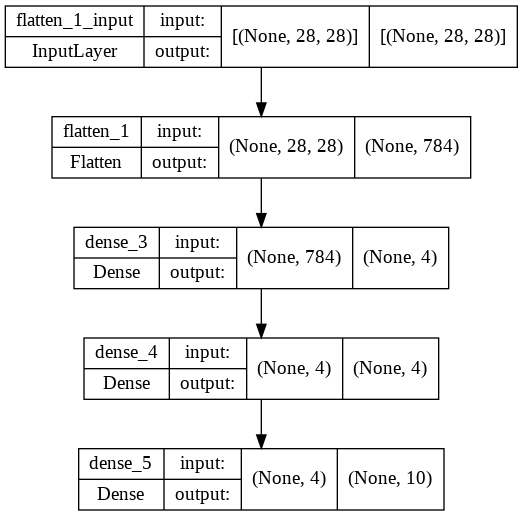

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model3,show_shapes=True)